<a href="https://colab.research.google.com/github/ultra151/cv/blob/main/14_DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout # Changed 'Iput' to 'Input'
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
save_path = '/content/gdrive/MyDrive/pytest_img/_generated_images'

if not os.path.exists(os.path.join(save_path, 'MNIST/')):
    os.makedirs(os.path.join(save_path, 'MNIST/'))

In [ ]:
generator = Sequential()
generator.add(Input(shape=(100,)))
generator.add(Dense(128*7*7, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

In [ ]:
discriminator = Sequential()
discriminator.add(Input(shape=(28, 28, 1)))
discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False

In [ ]:
ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(inputs=ginput, outputs=dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
d_loss = []
g_loss = []

In [ ]:
def gan_train(epoch, batch_size, saving_interval):
    (X_train, _), (_, _) = mnist.load_data()
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_train = (X_train - 127.5) / 127.5
    true = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))
    for i in range(epoch):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]
        d_loss_real = discriminator.train_on_batch(imgs, true)
        noise = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(noise)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss.append(0.5 * np.add(d_loss_real, d_loss_fake))
        g_loss.append(gan.train_on_batch(noise, true))
        d_loss_real = discriminator.train_on_batch(imgs, true)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        gan.train_on_batch(noise, true)
        if i % saving_interval == 0:
            noise = np.random.normal(0, 1, (25, 100))
            gen_imgs = generator.predict(noise)
            gen_imgs = 0.5 * gen_imgs + 0.5
            fig, axs = plt.subplots(5, 5)
            count = 0
            for j in range(5):
                for k in range(5):
                    axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                    axs[j, k].axis('off')
                    count += 1
                    fig.savefig(os.path.join(save_path, 'MNIST/') + 'gan_mnist_%d.png' % i)




1/1 [==============================] - 0s 37ms/step


<ipython-input-8-2999d58c86f4>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(5, 5)


1/1 [==============================] - 0s 39ms/step


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-06767a02b8a3>", line 1, in <cell line: 1>
    gan_train(40001, 32, 200)
  File "<ipython-input-8-2999d58c86f4>", line 15, in gan_train
    g_loss.append(gan.train_on_batch(noise, true))
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2779, in train_on_batch
    self.reset_metrics()
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2723, in reset_metrics
    m.reset_state()
  File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 265, in reset_state
    backend.batch_set_value([(v, 0) for v in self.variables])
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/l

TypeError: object of type 'NoneType' has no len()

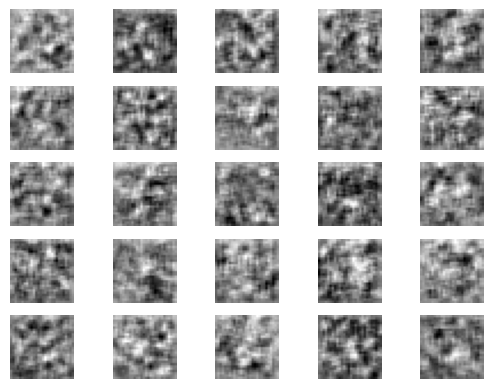

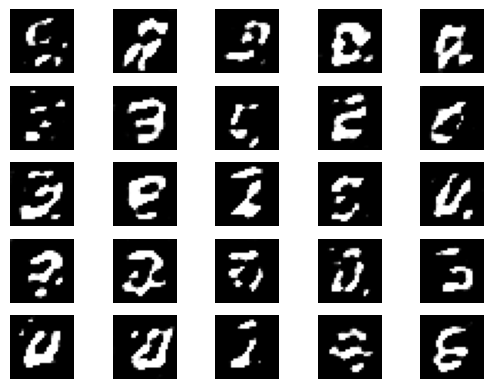

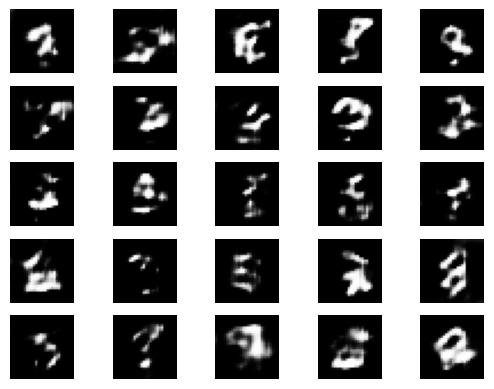

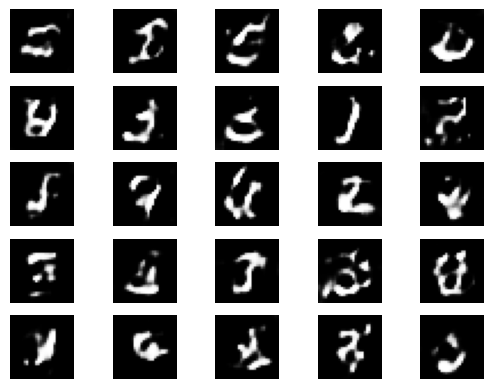

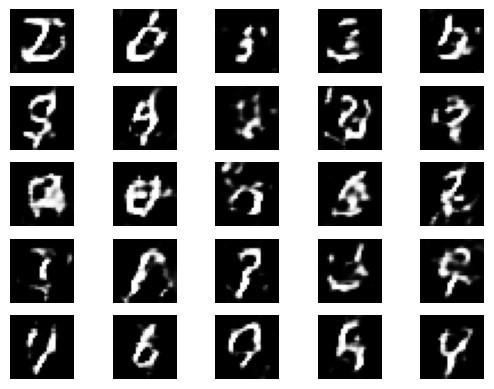

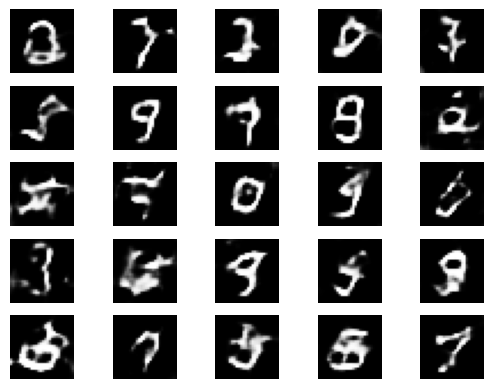

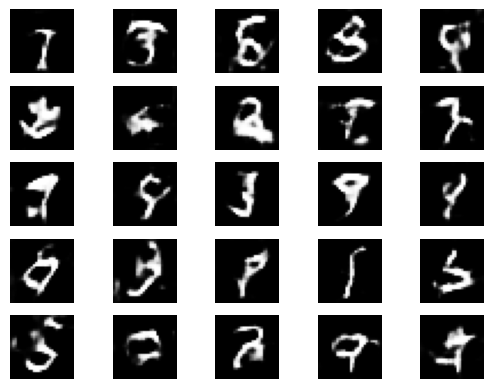

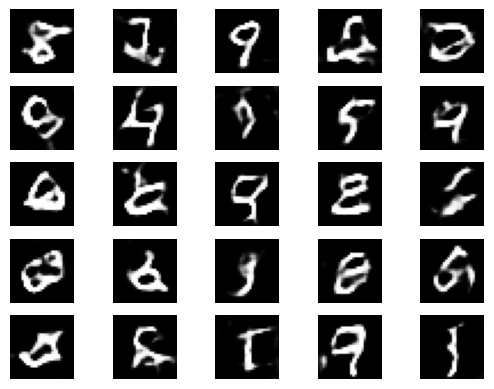

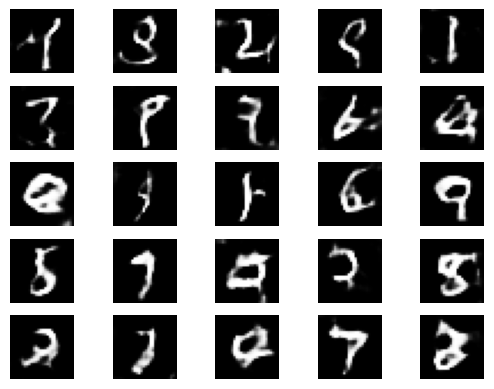

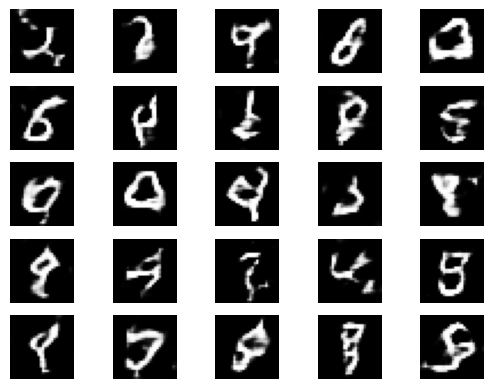

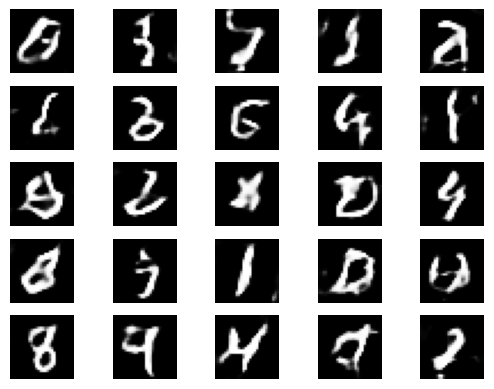

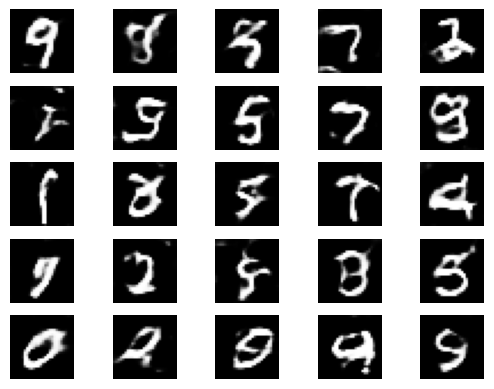

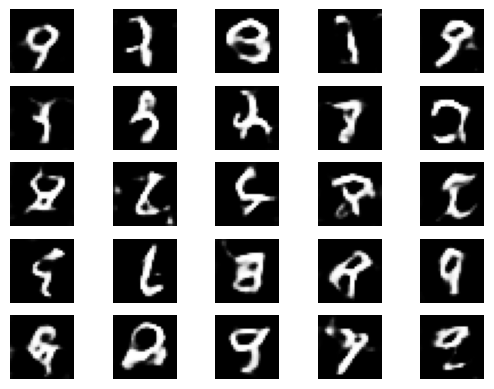

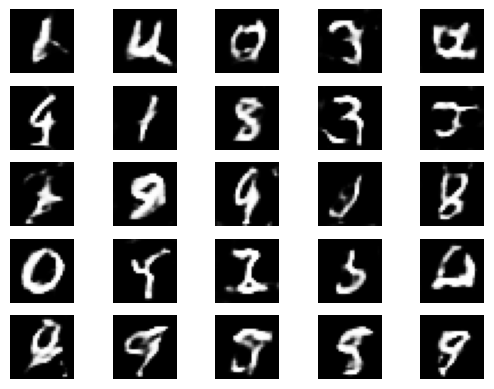

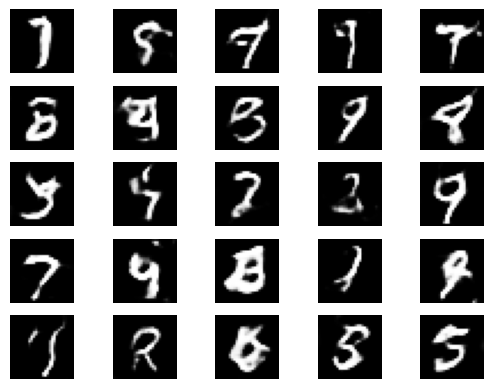

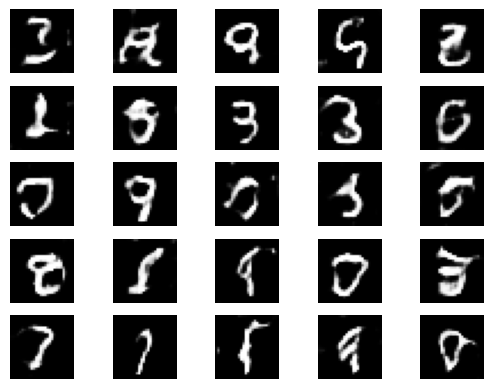

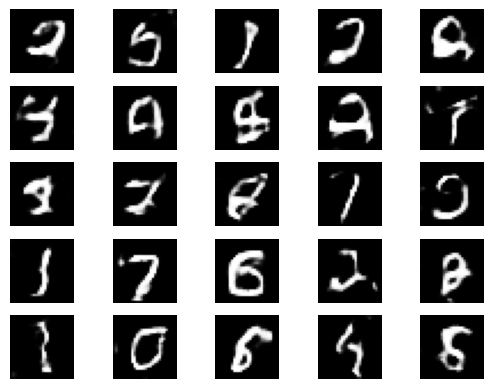

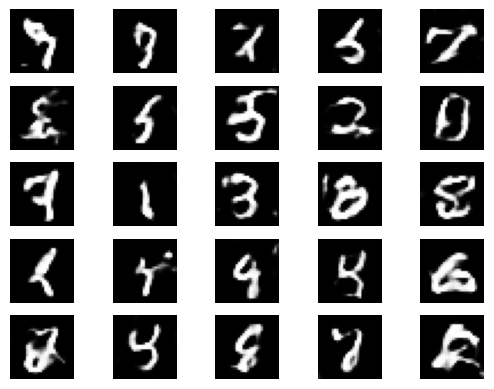

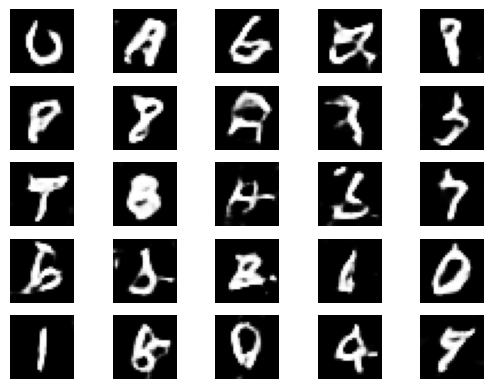

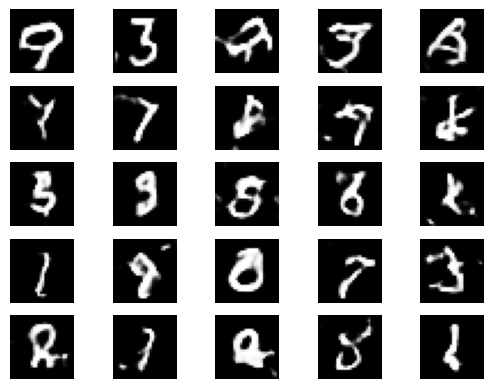

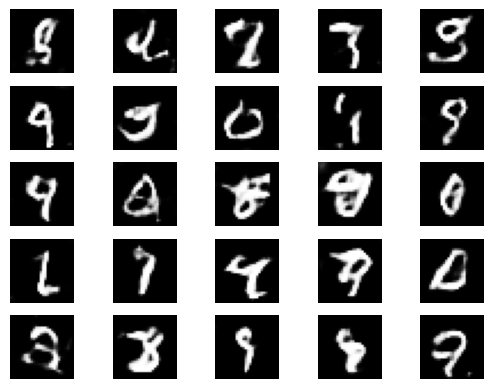

In [ ]:
gan_train(40001, 32, 200)

In [ ]:
import matplotlib.pyplot as plt

epochs = range(0, 40001)

plt.plot(epochs, g_loss, 'r', label='generator loss', linewidth=0.3)
plt.plot(epochs, d_loss, 'b', label='discriminator loss', linewidth=0.3)
plt.title('Generator and Discriminator Loss')
plt.legend()
plt.show()